In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Data Files
mouse_drug_data = './data/mouse_drug_data.csv'
clinical_trial_data = './data/clinicaltrial_data.csv'

# Read in Files
mouse_drug = pd.read_csv(mouse_drug_data)
clinical_trial = pd.read_csv(clinical_trial_data)

print(mouse_drug.head())
print(mouse_drug.shape)
print(clinical_trial.head())
print(clinical_trial.shape)

# Merge datasets on 'Mouse ID'
data = pd.merge(mouse_drug, clinical_trial, on='Mouse ID')
print(data.head())
print(data.shape)

  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
(250, 2)
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
(1893, 4)
  Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2
(1906, 5)


### Tumor Response to Treatment

In [2]:
groups = data[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint'])

mean_tumor_volume = groups.mean()
mean_tumor_volume.reset_index().head(15)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error = groups['Tumor Volume (mm3)'].sem()
std_error = std_error.reset_index()
std_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Reformat Data Frames
df = pd.pivot_table(mean_tumor_volume, index='Timepoint', columns='Drug')
df.columns = df.columns.get_level_values(1) # Flatten hierarchical index in columns
df.head()

# Limit analysis to only Capomulin, Infubinol, Ketapril, and Placebo
df_analysis = df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
df_analysis.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


No handles with labels found to put in legend.


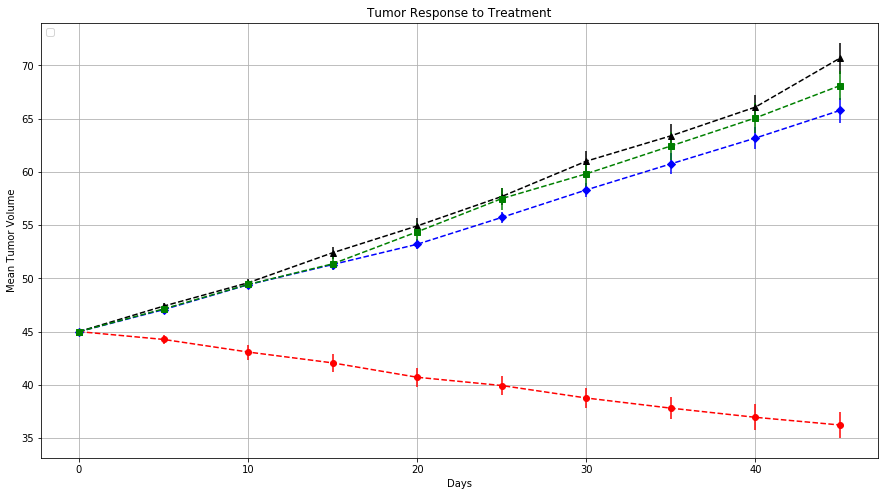

In [5]:
# Plot line graph with error bars
fig, ax = plt.subplots(figsize=(15,8))

x = df.index

graph_parameters = {
    'Capomulin':{'color':'r','marker':'o'},
    'Infubinol':{'color':'b','marker':'D'},
    'Ketapril':{'color':'k','marker':'^'},
    'Placebo':{'color':'g','marker':'s'}
}

for drug,params in graph_parameters.items():
    y = df[drug]
    yerr = std_error[std_error.Drug == drug]['Tumor Volume (mm3)']
    fmt=params['marker']+params['color']+'--'
    
    ax.errorbar(x, y, yerr=yerr, fmt=fmt)

ax.set(
    xlabel='Days',
    ylabel='Mean Tumor Volume',
    title='Tumor Response to Treatment'
)
ax.grid()

plt.legend(loc='upper left')
plt.show()

### Metastatic Response to Treatment
Metastasis is a pathogenic agent's spread from an initial or primary site to a different or secondary site within the host's body.

In [6]:
# Group dataset by Drug and Timepoint
groups = data[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint'])

# Get the mean Metastatic Sites per grouping
mean_meta_sites = groups.mean()

# Convert to Dataframe
mean_meta_sites = mean_meta_sites.reset_index()

mean_meta_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error of Metastatic Sites Grouped by Drug and Timepoint
std_error = groups['Metastatic Sites'].sem()
std_error = std_error.reset_index()
std_error.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Reformat Data Frames
df = pd.pivot_table(mean_meta_sites, index='Timepoint', columns='Drug')
df.columns = df.columns.get_level_values(1) # Flatten hierarchical index in columns
df.head()

# Limit analysis to only Capomulin, Infubinol, Ketapril, and Placebo
df_analysis = df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
df_analysis.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


No handles with labels found to put in legend.


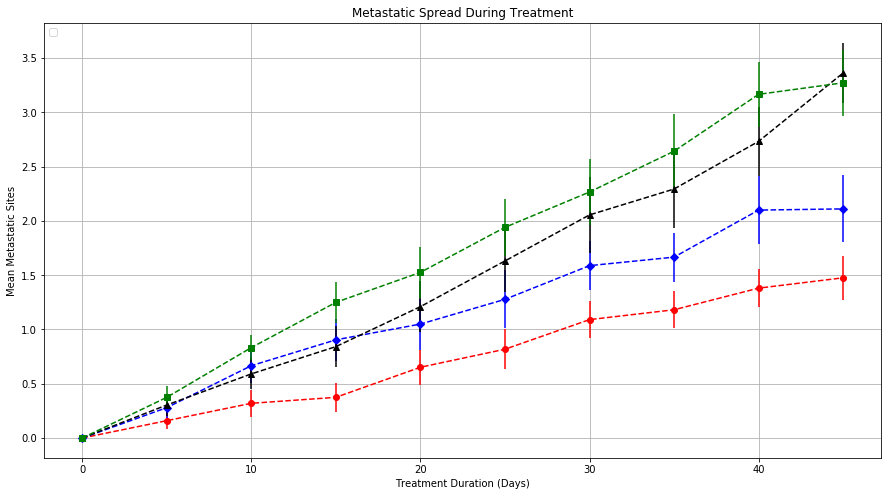

In [9]:
# Plot line graph with error bars
fig, ax = plt.subplots(figsize=(15,8))

x = df.index

graph_parameters = {
    'Capomulin':{'color':'r','marker':'o'},
    'Infubinol':{'color':'b','marker':'D'},
    'Ketapril':{'color':'k','marker':'^'},
    'Placebo':{'color':'g','marker':'s'}
}

for drug,params in graph_parameters.items():
    y = df[drug]
    yerr = std_error[std_error.Drug == drug]['Metastatic Sites']
    fmt=params['marker']+params['color']+'--'
    
    ax.errorbar(x, y, yerr=yerr, fmt=fmt)

ax.set(
    xlabel='Treatment Duration (Days)',
    ylabel='Mean Metastatic Sites',
    title='Metastatic Spread During Treatment'
)
ax.grid()

plt.legend(loc='upper left')
plt.show()

### Survival Rates

In [10]:
# Group dataset by Drug and Timepoint
groups = data[['Drug','Timepoint','Mouse ID']].groupby(['Drug','Timepoint'])

# Get the count of mice per grouping
count_mice = groups.count()

# Convert to Dataframe
count_mice = count_mice.reset_index()

count_mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Reformat Data Frames
df = pd.pivot_table(count_mice, index='Timepoint', columns='Drug')
df.columns = df.columns.get_level_values(1) # Flatten hierarchical index in columns
df.head()

# Limit analysis to only Capomulin, Infubinol, Ketapril, and Placebo
df_analysis = df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
df_analysis.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


No handles with labels found to put in legend.


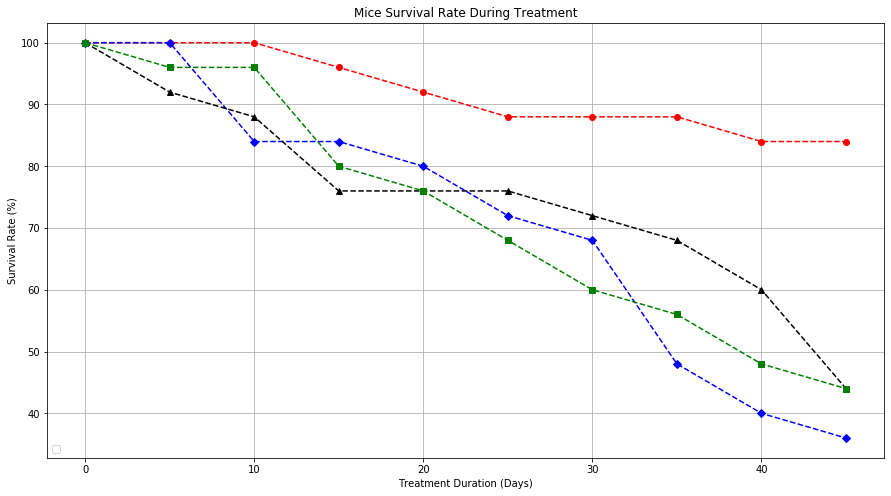

In [12]:
# Plot line graph with error bars
fig, ax = plt.subplots(figsize=(15,8))

x = df.index

graph_parameters = {
    'Capomulin':{'color':'r','marker':'o'},
    'Infubinol':{'color':'b','marker':'D'},
    'Ketapril':{'color':'k','marker':'^'},
    'Placebo':{'color':'g','marker':'s'}
}

for drug,params in graph_parameters.items():
    y = (df[drug] / 25) * 100 # Get survival rate
    fmt=params['marker']+params['color']+'--'
    
    ax.plot(x, y, color=params['color'], marker=params['marker'], linestyle='--')

ax.set(
    xlabel='Treatment Duration (Days)',
    ylabel='Survival Rate (%)',
    title='Mice Survival Rate During Treatment'
)
ax.grid()

plt.legend(loc='lower left')
plt.show()

### Summary Bar Graph

In [13]:
data_subset = data[['Timepoint', 'Drug','Tumor Volume (mm3)']]

# Reformat Data Frames
df = pd.pivot_table(data_subset, index='Timepoint', columns='Drug')
df.columns = df.columns.get_level_values(1) # Flatten hierarchical index in columns
df.head()

# Limit analysis to only Capomulin, Infubinol, Ketapril, and Placebo
df_analysis = df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
df_analysis

# Get percentage change from day 45 to day 0
for col in df_analysis.columns:
    pct_changes = ((df_analysis.loc[45] - df_analysis.loc[0])/ df_analysis.loc[0])*100

# Sort values in ascending for plotting
pct_changes                                       

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

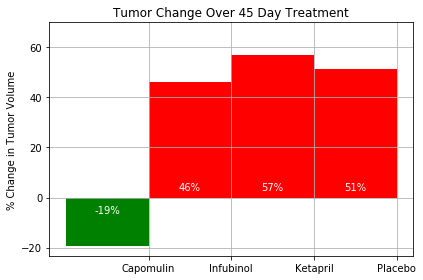

In [14]:
fig, ax = plt.subplots()

# Split data into passing and failing drugs
passing_drugs = pct_changes[pct_changes < 0]
failing_drugs = pct_changes[pct_changes > 0]

# Set x-values
x_passing = np.arange(len(passing_drugs))
x_failing = np.arange(start=x_passing+1, stop=len(pct_changes))

# Plot bars
bar_pass = ax.bar(
    x_passing,
    passing_drugs, 
    width=-1,
    align='edge',
    color='green'
)
bar_fail = ax.bar(
    x_failing,
    failing_drugs, 
    width=-1,
    align='edge',
    color='red'
)

# Set x-ticks
ax.set_xticks(np.arange(len(pct_changes)))
ax.set_xticklabels(pct_changes.index)

# Adjust Axis
ax.axis(ymax = 70)

# Axis Labels + Title
ax.set_ylabel("% Change in Tumor Volume")
ax.set_title("Tumor Change Over 45 Day Treatment")

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    """

    for rect in rects:
        height = rect.get_height()
        text = str(int(round(height,0))) + '%'
        if height > 0:
            y = 2
        else:
            y = -7
        ax.annotate(text,
                    xy=(rect.get_x() + rect.get_width() / 2, y),
                    ha='center', va='bottom', color='w')

# Apply Labels to Bars
autolabel(bar_pass)
autolabel(bar_fail)

ax.grid()
fig.tight_layout()
plt.show()